Titanic Survivors Data Analysis and Predictions

In [13]:
#Importing the necessary packages

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math, time, random, datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

import missingno


Load the dataset into the notebook

In [14]:
train = pd.read_csv('C:\\Users\\Ajay Sen Riti\\Downloads\\train.csv')
test = pd.read_csv('C:\\Users\\Ajay Sen Riti\\Downloads\\test.csv')
gender_sub = pd.read_csv('C:\\Users\\Ajay Sen Riti\\Downloads\\gender_submission.csv')

In [15]:
#View the training data
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
gender_sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


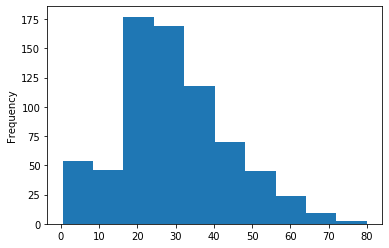

In [7]:
train.Age.plot.hist()

##Description of the Data:

Data Descriptions
Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


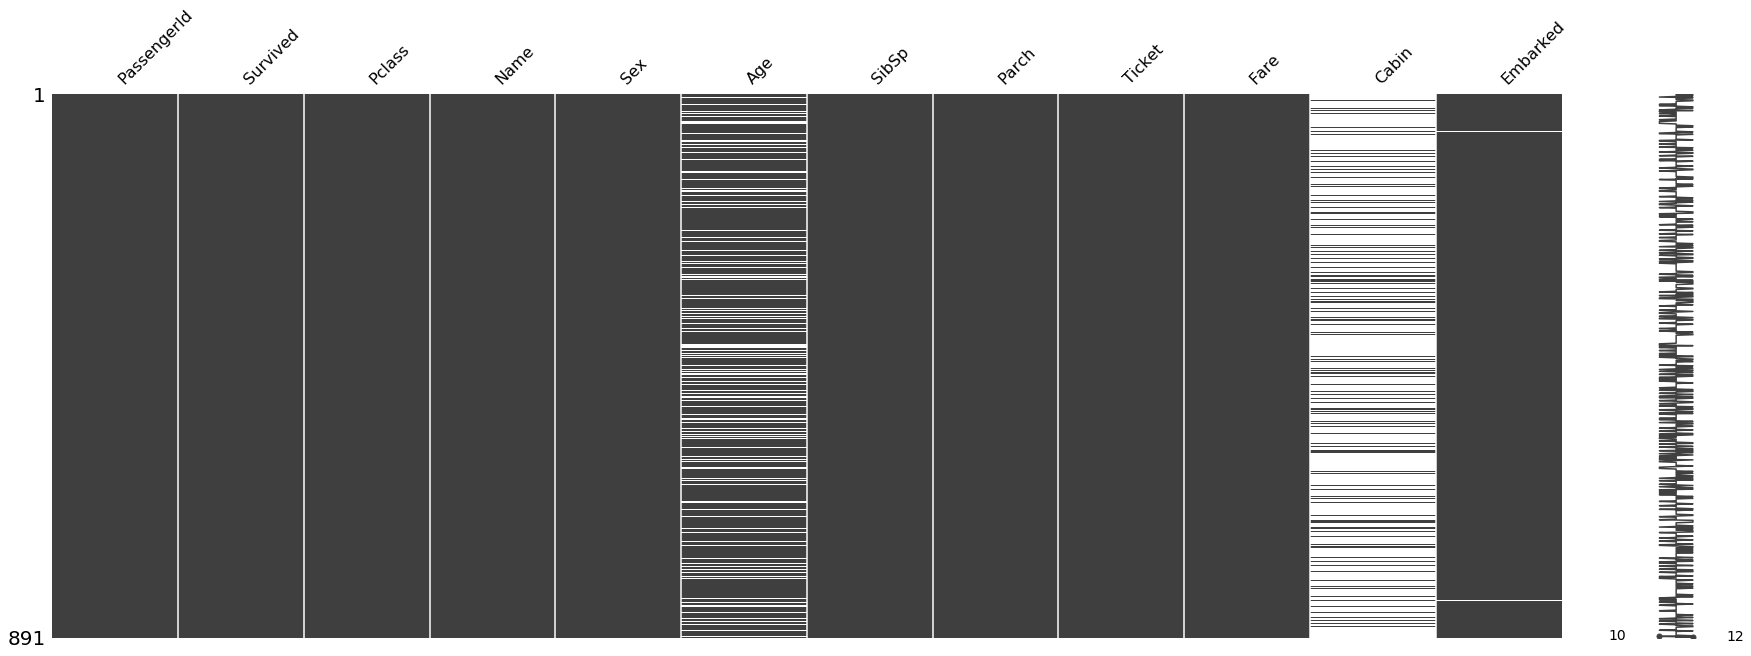

In [10]:
# Lets check whether the missing values are there in the data.
# Lets use a library called missingno

missingno.matrix(train,figsize=(30,10))

From the above plot it is clear that there are lot of missing values in Cabin column.

In [11]:
# Checking the number of missing values (in numbers)

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Analysis

Step 1 : Creating two new Data Frames

In [18]:
df_bin = pd.DataFrame() #for discretised continuous variables
df_con = pd.DataFrame() #for continuous variables

Step 2 : Types of variables in the dataset

In [19]:
#Different datatypes in the dataset

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Step 3 : Figuring out the target variables fro the train dataset

In [20]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


SURVIVED : is the target variable and this is the one which our machine learning model should predict.

        0 represents did not survived
        
        1 represents survives

0    549
1    342
Name: Survived, dtype: int64


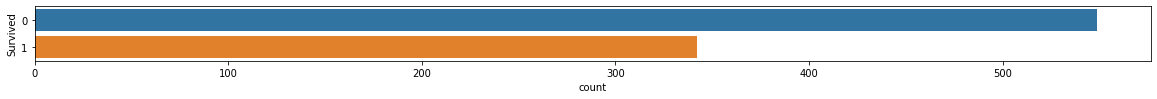

In [21]:
#Lets see how many people has survived as per the dataset

fig = plt.figure(figsize=(20,1))
sns.countplot(y="Survived", data=train)
print(train.Survived.value_counts())

In [22]:
#Lets add this to our sub-dataset that we have created

df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [23]:
df_bin.head(5)

,Survived
0,0
1,1
2,1
3,1
4,0


In [24]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


##Feature : P class (Passenger Class)

Which class did the passenger travel in Titanic?

1 = 1st class

2 = 2nd Class

3 = 3rd Class

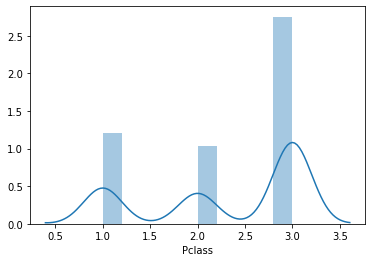

In [25]:
#Plotting the distribution

sns.distplot(train.Pclass)

In [26]:
#number of missing values in Pclass

train.Pclass.isnull().sum()

0

In [27]:
# Since there is no missing values lets go ahead and add it to our sub-dataframe

df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

Feature : Name 

Name of the passenger

In [29]:
#Uniqueness of names

train.Name.value_counts()

Sloper, Mr. William Thompson                            1
Bracken, Mr. James H                                    1
Angle, Mrs. William A (Florence "Mary" Agnes Hughes)    1
Kelly, Miss. Mary                                       1
Palsson, Miss. Stina Viola                              1
                                                       ..
Smith, Miss. Marion Elsie                               1
Crosby, Miss. Harriet R                                 1
Meyer, Mr. Edgar Joseph                                 1
Harris, Mr. George                                      1
Karlsson, Mr. Nils August                               1
Name: Name, Length: 891, dtype: int64

Feature : Sex

Sex of the passenger

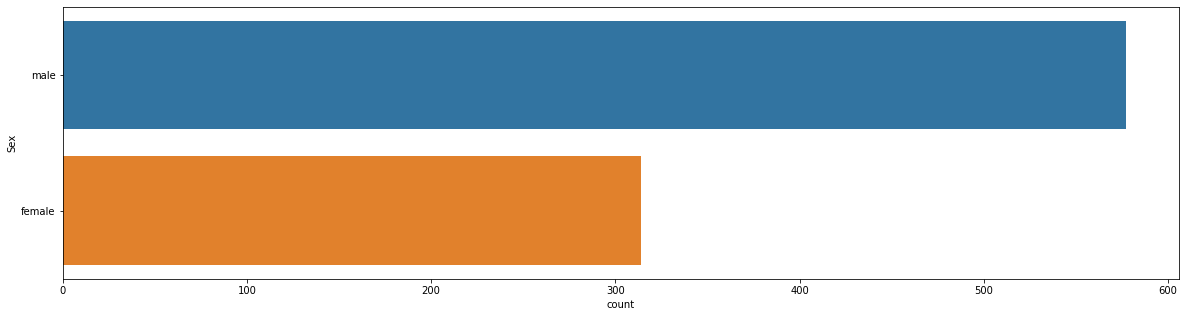

In [30]:
# Let's view the distribution of the sex in the data.

plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [31]:
#Lets check the missing values of Sex

train.Sex.isnull().sum()

0

In [32]:
# The sex only has two categories Male or female. So adding it to our subset

train.Sex.head(3)

0      male
1    female
2    female
Name: Sex, dtype: object

In [33]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female
df_con['Sex'] = train['Sex']

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

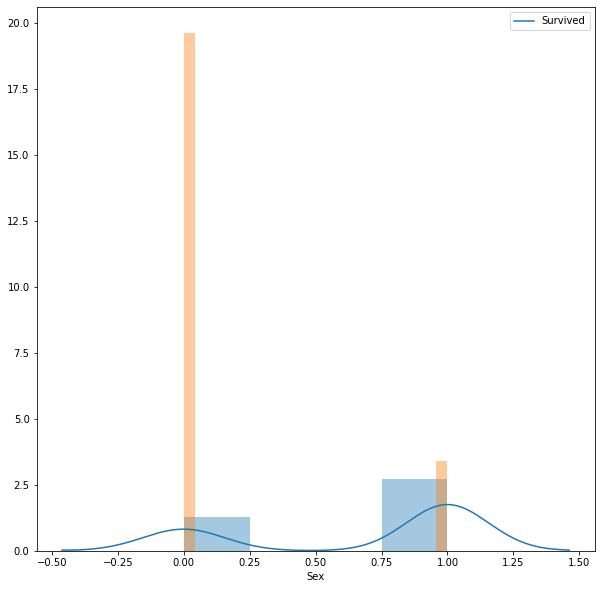

In [60]:
## SEX VS SURVIVAL

fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'],kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

The blue bar above denotes the survived. So it is clear that females survived a lot.

FEATURE : AGE

In [62]:
#Missing values in the Age column in Train Dataset

train.Age.isnull().sum()

177

There are 891 rows and almost 177 are missing values

In [63]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

Feature : SibSp

Number of Sibling or Spouse, the passenger has

In [64]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [66]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [67]:
# Lets Add Sibsp to our Sub-set Data

df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

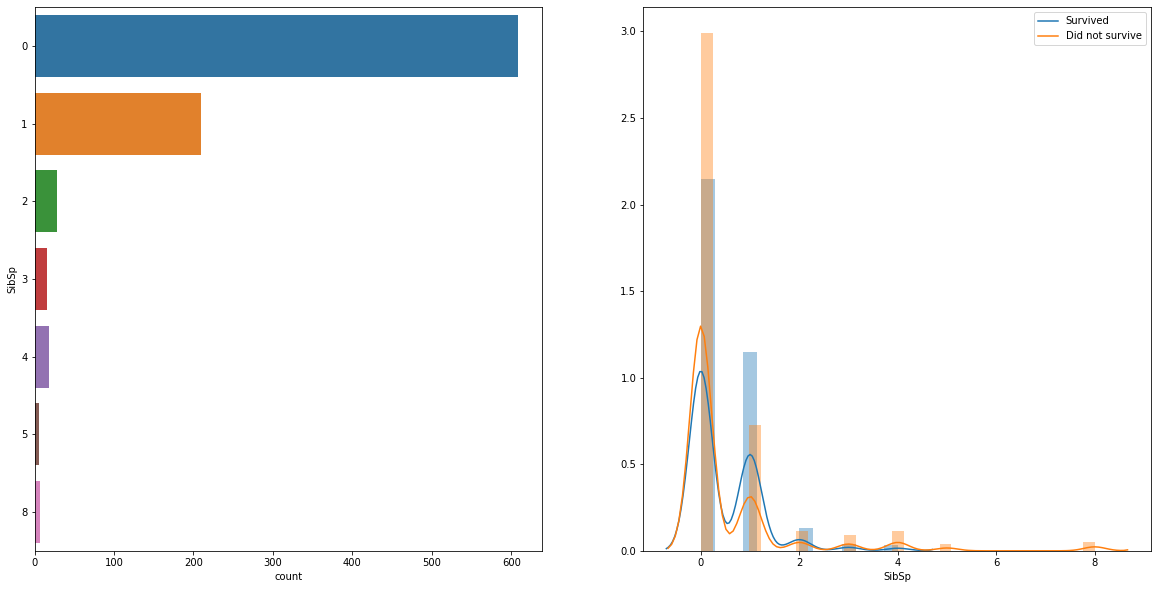

In [68]:
#Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

Feature : Parch
    
Description : The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [70]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [72]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [73]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

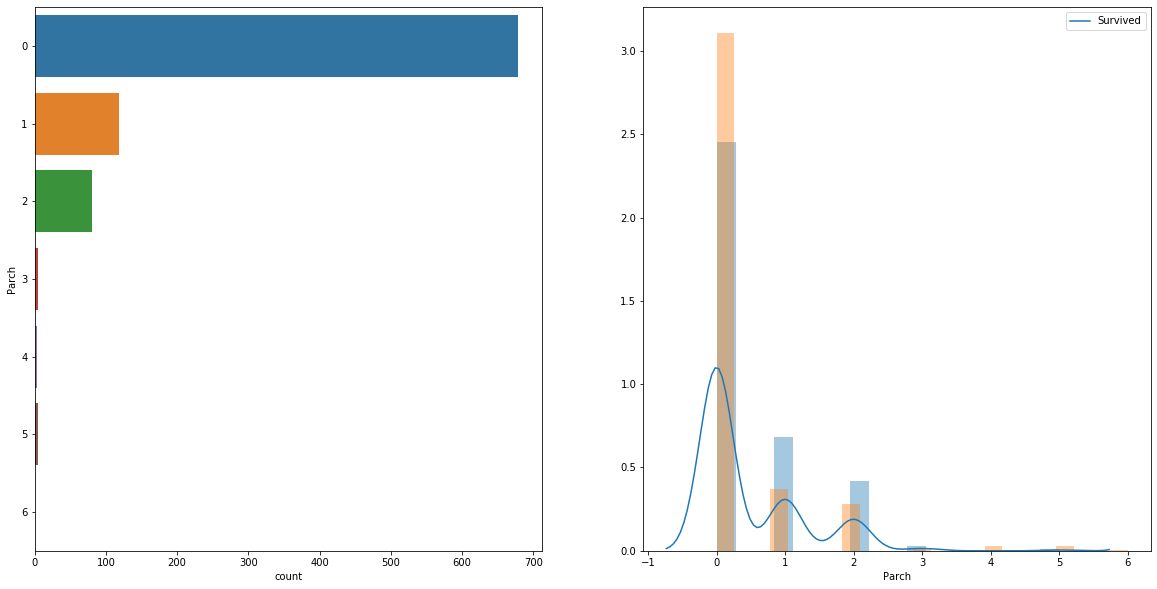

In [74]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

Feature : Ticket

Ticket Number of the boarding passenger

In [76]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

In [78]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
3101295     6
           ..
113767      1
3474        1
368703      1
244270      1
36864       1
Name: Ticket, Length: 681, dtype: int64

In [79]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


Feature : Fare

Description : How much the ticket costs?

In [80]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

In [82]:
train.Fare.dtype

dtype('float64')

In [83]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


In [84]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [85]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

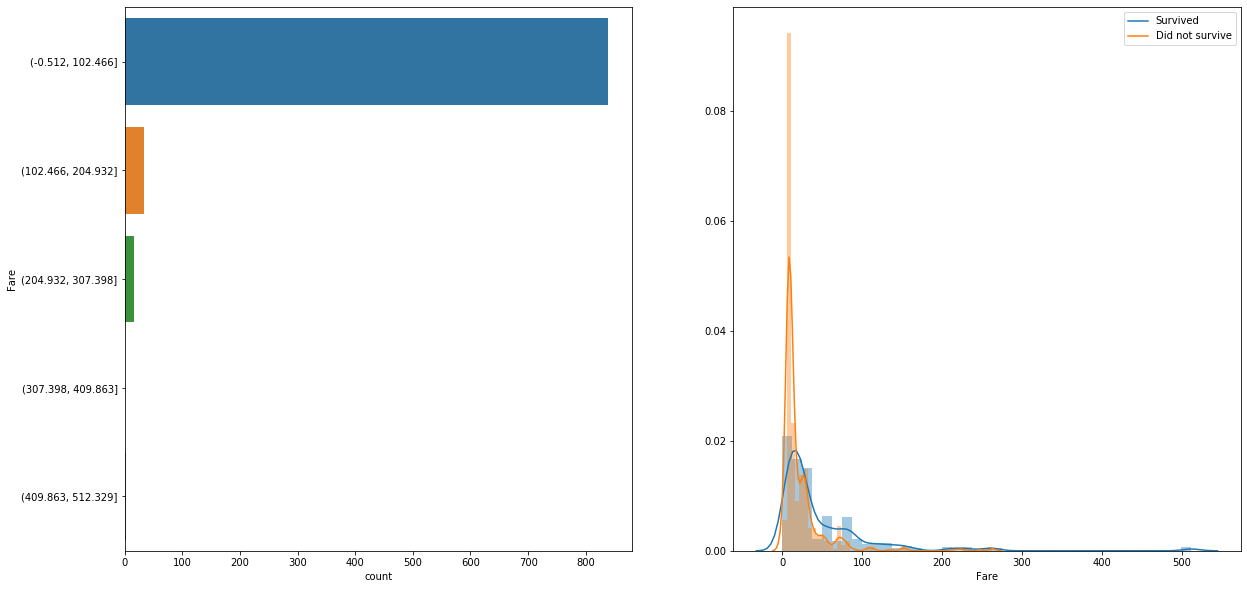

In [86]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

Feature : Cabin

In [89]:

# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [90]:
# What do the Cabin values look like?
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
E101           3
              ..
C86            1
E46            1
F38            1
D56            1
A34            1
Name: Cabin, Length: 147, dtype: int64

Feature: Embarked

Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [91]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [92]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

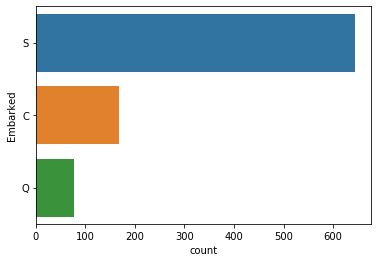

In [93]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

In [94]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [95]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


FEATURE ENCODING

Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (df_bin) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn.

In [96]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [97]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


In [98]:

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [99]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [100]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


START BUILDING MACHINE LEARNING MODELS

Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

Lets Seperate the model

In [101]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [102]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [103]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [104]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [105]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [106]:
# Shape of the labels
y_train.shape

(889,)

 Now lets write down a function to fit machine learning algorithms


Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [107]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

##Logistical regression

In [108]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:01.585870


##K-Nearest Neighbours

In [110]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.063829


##Gaussian Naive Bayes

In [111]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.043948


##Linear Support Vector Machines

In [112]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 69.52
Accuracy CV 10-Fold: 75.37
Running Time: 0:00:00.116772


##Stochastic Gradient Descent

In [113]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 73.57
Accuracy CV 10-Fold: 69.74
Running Time: 0:00:00.037913


##Decision Tree Classifier

In [114]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.2
Running Time: 0:00:00.043526


##Gradient Boost Trees

In [116]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.232227


##CatBoost Algorithm

CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

In [117]:
# View the data for the CatBoost model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [119]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [120]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

This means Catboost has picked up that all variables except Fare can be treated as categorical.

In [121]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [122]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [123]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 73.5ms	remaining: 1m 13s
1:	learn: 0.6809444	total: 79.7ms	remaining: 39.8s
2:	learn: 0.6751692	total: 93.6ms	remaining: 31.1s
3:	learn: 0.6689060	total: 108ms	remaining: 26.8s
4:	learn: 0.6632144	total: 115ms	remaining: 22.9s
5:	learn: 0.6576488	total: 123ms	remaining: 20.4s
6:	learn: 0.6544441	total: 124ms	remaining: 17.6s
7:	learn: 0.6490635	total: 135ms	remaining: 16.7s
8:	learn: 0.6443241	total: 145ms	remaining: 16s
9:	learn: 0.6395935	total: 156ms	remaining: 15.4s
10:	learn: 0.6345186	total: 165ms	remaining: 14.8s
11:	learn: 0.6305316	total: 173ms	remaining: 14.3s
12:	learn: 0.6275610	total: 176ms	remaining: 13.4s
13:	learn: 0.6225020	total: 185ms	remaining: 13s
14:	learn: 0.6179503	total: 191ms	remaining: 12.5s
15:	learn: 0.6140480	total: 193ms	remaining: 11.9s
16:	learn: 0.6100034	total: 200ms	remaining: 11.6s
17:	learn: 0.6049646	total: 210ms	remaining: 11.4s
18:	learn: 0.6025760	total: 212ms	remaining: 10.9s
19:	learn: 

162:	learn: 0.4236345	total: 1.12s	remaining: 5.74s
163:	learn: 0.4234396	total: 1.12s	remaining: 5.72s
164:	learn: 0.4228926	total: 1.13s	remaining: 5.71s
165:	learn: 0.4227463	total: 1.14s	remaining: 5.75s
166:	learn: 0.4226186	total: 1.17s	remaining: 5.82s
167:	learn: 0.4222141	total: 1.18s	remaining: 5.85s
168:	learn: 0.4219366	total: 1.19s	remaining: 5.86s
169:	learn: 0.4216245	total: 1.2s	remaining: 5.85s
170:	learn: 0.4213900	total: 1.2s	remaining: 5.83s
171:	learn: 0.4210836	total: 1.21s	remaining: 5.85s
172:	learn: 0.4208199	total: 1.22s	remaining: 5.84s
173:	learn: 0.4206421	total: 1.23s	remaining: 5.84s
174:	learn: 0.4201114	total: 1.23s	remaining: 5.82s
175:	learn: 0.4198212	total: 1.24s	remaining: 5.79s
176:	learn: 0.4195834	total: 1.24s	remaining: 5.78s
177:	learn: 0.4195685	total: 1.24s	remaining: 5.74s
178:	learn: 0.4194809	total: 1.24s	remaining: 5.71s
179:	learn: 0.4191368	total: 1.25s	remaining: 5.71s
180:	learn: 0.4185960	total: 1.27s	remaining: 5.74s
181:	learn: 0.

332:	learn: 0.3920570	total: 2.25s	remaining: 4.5s
333:	learn: 0.3918707	total: 2.26s	remaining: 4.5s
334:	learn: 0.3917635	total: 2.27s	remaining: 4.5s
335:	learn: 0.3916127	total: 2.27s	remaining: 4.49s
336:	learn: 0.3914735	total: 2.28s	remaining: 4.49s
337:	learn: 0.3914486	total: 2.29s	remaining: 4.48s
338:	learn: 0.3912764	total: 2.3s	remaining: 4.49s
339:	learn: 0.3911365	total: 2.31s	remaining: 4.48s
340:	learn: 0.3910828	total: 2.31s	remaining: 4.46s
341:	learn: 0.3910413	total: 2.31s	remaining: 4.45s
342:	learn: 0.3910351	total: 2.32s	remaining: 4.44s
343:	learn: 0.3908388	total: 2.32s	remaining: 4.42s
344:	learn: 0.3907468	total: 2.33s	remaining: 4.41s
345:	learn: 0.3905556	total: 2.33s	remaining: 4.41s
346:	learn: 0.3905329	total: 2.33s	remaining: 4.39s
347:	learn: 0.3904624	total: 2.34s	remaining: 4.38s
348:	learn: 0.3904620	total: 2.34s	remaining: 4.36s
349:	learn: 0.3901004	total: 2.35s	remaining: 4.36s
350:	learn: 0.3900990	total: 2.35s	remaining: 4.34s
351:	learn: 0.38

494:	learn: 0.3771236	total: 3.17s	remaining: 3.24s
495:	learn: 0.3770363	total: 3.18s	remaining: 3.23s
496:	learn: 0.3769634	total: 3.19s	remaining: 3.23s
497:	learn: 0.3769625	total: 3.19s	remaining: 3.22s
498:	learn: 0.3768613	total: 3.2s	remaining: 3.21s
499:	learn: 0.3768611	total: 3.2s	remaining: 3.2s
500:	learn: 0.3768153	total: 3.21s	remaining: 3.19s
501:	learn: 0.3767849	total: 3.21s	remaining: 3.18s
502:	learn: 0.3765500	total: 3.22s	remaining: 3.18s
503:	learn: 0.3763980	total: 3.23s	remaining: 3.18s
504:	learn: 0.3763692	total: 3.23s	remaining: 3.17s
505:	learn: 0.3763085	total: 3.24s	remaining: 3.16s
506:	learn: 0.3761631	total: 3.25s	remaining: 3.15s
507:	learn: 0.3760934	total: 3.25s	remaining: 3.15s
508:	learn: 0.3760498	total: 3.26s	remaining: 3.14s
509:	learn: 0.3760150	total: 3.27s	remaining: 3.14s
510:	learn: 0.3759970	total: 3.28s	remaining: 3.14s
511:	learn: 0.3759798	total: 3.28s	remaining: 3.13s
512:	learn: 0.3759568	total: 3.29s	remaining: 3.12s
513:	learn: 0.3

653:	learn: 0.3644317	total: 4.13s	remaining: 2.18s
654:	learn: 0.3644178	total: 4.13s	remaining: 2.17s
655:	learn: 0.3642661	total: 4.14s	remaining: 2.17s
656:	learn: 0.3642146	total: 4.15s	remaining: 2.16s
657:	learn: 0.3642143	total: 4.15s	remaining: 2.15s
658:	learn: 0.3641970	total: 4.15s	remaining: 2.15s
659:	learn: 0.3641835	total: 4.15s	remaining: 2.14s
660:	learn: 0.3641783	total: 4.15s	remaining: 2.13s
661:	learn: 0.3640790	total: 4.16s	remaining: 2.12s
662:	learn: 0.3640602	total: 4.16s	remaining: 2.12s
663:	learn: 0.3639463	total: 4.17s	remaining: 2.11s
664:	learn: 0.3639302	total: 4.17s	remaining: 2.1s
665:	learn: 0.3638903	total: 4.17s	remaining: 2.09s
666:	learn: 0.3637239	total: 4.17s	remaining: 2.08s
667:	learn: 0.3635881	total: 4.19s	remaining: 2.08s
668:	learn: 0.3634772	total: 4.2s	remaining: 2.08s
669:	learn: 0.3634068	total: 4.21s	remaining: 2.07s
670:	learn: 0.3633759	total: 4.21s	remaining: 2.07s
671:	learn: 0.3631802	total: 4.23s	remaining: 2.06s
672:	learn: 0.

825:	learn: 0.3527557	total: 5.54s	remaining: 1.17s
826:	learn: 0.3527494	total: 5.55s	remaining: 1.16s
827:	learn: 0.3527097	total: 5.56s	remaining: 1.15s
828:	learn: 0.3525818	total: 5.57s	remaining: 1.15s
829:	learn: 0.3525719	total: 5.57s	remaining: 1.14s
830:	learn: 0.3523327	total: 5.58s	remaining: 1.14s
831:	learn: 0.3523023	total: 5.58s	remaining: 1.13s
832:	learn: 0.3522949	total: 5.59s	remaining: 1.12s
833:	learn: 0.3521358	total: 5.59s	remaining: 1.11s
834:	learn: 0.3521053	total: 5.6s	remaining: 1.11s
835:	learn: 0.3520985	total: 5.6s	remaining: 1.1s
836:	learn: 0.3520746	total: 5.61s	remaining: 1.09s
837:	learn: 0.3519963	total: 5.62s	remaining: 1.09s
838:	learn: 0.3519587	total: 5.63s	remaining: 1.08s
839:	learn: 0.3518946	total: 5.64s	remaining: 1.07s
840:	learn: 0.3518871	total: 5.64s	remaining: 1.07s
841:	learn: 0.3518257	total: 5.65s	remaining: 1.06s
842:	learn: 0.3518257	total: 5.65s	remaining: 1.05s
843:	learn: 0.3516969	total: 5.67s	remaining: 1.05s
844:	learn: 0.3

989:	learn: 0.3404401	total: 6.88s	remaining: 69.5ms
990:	learn: 0.3403797	total: 6.89s	remaining: 62.6ms
991:	learn: 0.3403515	total: 6.9s	remaining: 55.7ms
992:	learn: 0.3402624	total: 6.91s	remaining: 48.7ms
993:	learn: 0.3402175	total: 6.92s	remaining: 41.7ms
994:	learn: 0.3399939	total: 6.93s	remaining: 34.8ms
995:	learn: 0.3399342	total: 6.94s	remaining: 27.9ms
996:	learn: 0.3398669	total: 6.95s	remaining: 20.9ms
997:	learn: 0.3398219	total: 6.95s	remaining: 13.9ms
998:	learn: 0.3397748	total: 6.96s	remaining: 6.96ms
999:	learn: 0.3396214	total: 6.97s	remaining: 0us


In [124]:
##Perform Cat-boost Cross validation
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 270ms	remaining: 4m 29s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 579ms	remaining: 4m 48s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 908ms	remaining: 5m 1s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 1.12s	remaining: 4m 39s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 1.34s	remaining: 4m 26s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 1.55s	remaining: 4m 17s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 1.78s	remaining: 4m 12s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 2s	remaining: 4m 8s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 2.22s	remaining: 4m 4s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 2.44s	remaining: 4m 1s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 2.66s	remaining: 3m 59s
11:	learn: 0.5447302	test: 0.5517930	best: 0.551

94:	learn: 0.3949190	test: 0.4403517	best: 0.4403517 (94)	total: 18.8s	remaining: 2m 59s
95:	learn: 0.3944340	test: 0.4402716	best: 0.4402716 (95)	total: 19.1s	remaining: 2m 59s
96:	learn: 0.3939860	test: 0.4401340	best: 0.4401340 (96)	total: 19.2s	remaining: 2m 59s
97:	learn: 0.3934840	test: 0.4400352	best: 0.4400352 (97)	total: 19.4s	remaining: 2m 58s
98:	learn: 0.3930306	test: 0.4398759	best: 0.4398759 (98)	total: 19.6s	remaining: 2m 58s
99:	learn: 0.3925201	test: 0.4396396	best: 0.4396396 (99)	total: 19.8s	remaining: 2m 58s
100:	learn: 0.3920257	test: 0.4394660	best: 0.4394660 (100)	total: 19.9s	remaining: 2m 57s
101:	learn: 0.3916652	test: 0.4393186	best: 0.4393186 (101)	total: 20.1s	remaining: 2m 56s
102:	learn: 0.3911312	test: 0.4393401	best: 0.4393186 (101)	total: 20.3s	remaining: 2m 56s
103:	learn: 0.3907873	test: 0.4392190	best: 0.4392190 (103)	total: 20.5s	remaining: 2m 56s
104:	learn: 0.3904307	test: 0.4391417	best: 0.4391417 (104)	total: 20.7s	remaining: 2m 56s
105:	learn:

186:	learn: 0.3666935	test: 0.4381824	best: 0.4375885 (133)	total: 37.4s	remaining: 2m 42s
187:	learn: 0.3663794	test: 0.4382216	best: 0.4375885 (133)	total: 37.6s	remaining: 2m 42s
188:	learn: 0.3661612	test: 0.4383193	best: 0.4375885 (133)	total: 37.8s	remaining: 2m 42s
189:	learn: 0.3658713	test: 0.4384194	best: 0.4375885 (133)	total: 38s	remaining: 2m 42s
190:	learn: 0.3655909	test: 0.4384293	best: 0.4375885 (133)	total: 38.2s	remaining: 2m 41s
191:	learn: 0.3653505	test: 0.4385599	best: 0.4375885 (133)	total: 38.4s	remaining: 2m 41s
192:	learn: 0.3650680	test: 0.4385466	best: 0.4375885 (133)	total: 38.6s	remaining: 2m 41s
193:	learn: 0.3648928	test: 0.4385777	best: 0.4375885 (133)	total: 38.7s	remaining: 2m 40s
194:	learn: 0.3645239	test: 0.4385109	best: 0.4375885 (133)	total: 39.1s	remaining: 2m 41s
195:	learn: 0.3643312	test: 0.4384696	best: 0.4375885 (133)	total: 39.3s	remaining: 2m 41s
196:	learn: 0.3639504	test: 0.4384805	best: 0.4375885 (133)	total: 39.5s	remaining: 2m 41s
1

277:	learn: 0.3443555	test: 0.4387197	best: 0.4375885 (133)	total: 57.5s	remaining: 2m 29s
278:	learn: 0.3440870	test: 0.4386088	best: 0.4375885 (133)	total: 57.7s	remaining: 2m 29s
279:	learn: 0.3439100	test: 0.4386475	best: 0.4375885 (133)	total: 57.9s	remaining: 2m 28s
280:	learn: 0.3436557	test: 0.4385537	best: 0.4375885 (133)	total: 58.2s	remaining: 2m 28s
281:	learn: 0.3434167	test: 0.4384602	best: 0.4375885 (133)	total: 58.4s	remaining: 2m 28s
282:	learn: 0.3432213	test: 0.4383785	best: 0.4375885 (133)	total: 58.6s	remaining: 2m 28s
283:	learn: 0.3429632	test: 0.4383874	best: 0.4375885 (133)	total: 58.8s	remaining: 2m 28s
284:	learn: 0.3427279	test: 0.4383233	best: 0.4375885 (133)	total: 59.2s	remaining: 2m 28s
285:	learn: 0.3423478	test: 0.4382080	best: 0.4375885 (133)	total: 59.4s	remaining: 2m 28s
286:	learn: 0.3421475	test: 0.4380605	best: 0.4375885 (133)	total: 59.6s	remaining: 2m 28s
287:	learn: 0.3419452	test: 0.4379682	best: 0.4375885 (133)	total: 59.8s	remaining: 2m 27s

367:	learn: 0.3213807	test: 0.4362397	best: 0.4360940 (366)	total: 1m 19s	remaining: 2m 16s
368:	learn: 0.3211389	test: 0.4361821	best: 0.4360940 (366)	total: 1m 19s	remaining: 2m 16s
369:	learn: 0.3209201	test: 0.4361287	best: 0.4360940 (366)	total: 1m 20s	remaining: 2m 16s
370:	learn: 0.3206996	test: 0.4363473	best: 0.4360940 (366)	total: 1m 20s	remaining: 2m 16s
371:	learn: 0.3205512	test: 0.4363766	best: 0.4360940 (366)	total: 1m 20s	remaining: 2m 15s
372:	learn: 0.3202935	test: 0.4364415	best: 0.4360940 (366)	total: 1m 20s	remaining: 2m 15s
373:	learn: 0.3199733	test: 0.4364016	best: 0.4360940 (366)	total: 1m 21s	remaining: 2m 15s
374:	learn: 0.3197546	test: 0.4361238	best: 0.4360940 (366)	total: 1m 21s	remaining: 2m 15s
375:	learn: 0.3194998	test: 0.4360068	best: 0.4360068 (375)	total: 1m 21s	remaining: 2m 15s
376:	learn: 0.3193330	test: 0.4359073	best: 0.4359073 (376)	total: 1m 21s	remaining: 2m 14s
377:	learn: 0.3190245	test: 0.4359349	best: 0.4359073 (376)	total: 1m 21s	remain

457:	learn: 0.3008086	test: 0.4327766	best: 0.4327188 (455)	total: 1m 41s	remaining: 2m
458:	learn: 0.3005801	test: 0.4328156	best: 0.4327188 (455)	total: 1m 41s	remaining: 2m
459:	learn: 0.3003333	test: 0.4325987	best: 0.4325987 (459)	total: 1m 42s	remaining: 1m 59s
460:	learn: 0.3000832	test: 0.4324942	best: 0.4324942 (460)	total: 1m 42s	remaining: 1m 59s
461:	learn: 0.2998646	test: 0.4324690	best: 0.4324690 (461)	total: 1m 42s	remaining: 1m 59s
462:	learn: 0.2996204	test: 0.4324480	best: 0.4324480 (462)	total: 1m 42s	remaining: 1m 59s
463:	learn: 0.2994862	test: 0.4326292	best: 0.4324480 (462)	total: 1m 43s	remaining: 1m 59s
464:	learn: 0.2992283	test: 0.4327959	best: 0.4324480 (462)	total: 1m 43s	remaining: 1m 59s
465:	learn: 0.2990366	test: 0.4327003	best: 0.4324480 (462)	total: 1m 43s	remaining: 1m 58s
466:	learn: 0.2988784	test: 0.4326385	best: 0.4324480 (462)	total: 1m 43s	remaining: 1m 58s
467:	learn: 0.2987069	test: 0.4326653	best: 0.4324480 (462)	total: 1m 44s	remaining: 1m 

547:	learn: 0.2837447	test: 0.4328972	best: 0.4320750 (502)	total: 2m 4s	remaining: 1m 42s
548:	learn: 0.2836129	test: 0.4328757	best: 0.4320750 (502)	total: 2m 5s	remaining: 1m 42s
549:	learn: 0.2834452	test: 0.4328815	best: 0.4320750 (502)	total: 2m 5s	remaining: 1m 42s
550:	learn: 0.2832135	test: 0.4328405	best: 0.4320750 (502)	total: 2m 5s	remaining: 1m 42s
551:	learn: 0.2829742	test: 0.4330066	best: 0.4320750 (502)	total: 2m 5s	remaining: 1m 42s
552:	learn: 0.2827988	test: 0.4329146	best: 0.4320750 (502)	total: 2m 6s	remaining: 1m 41s
553:	learn: 0.2825728	test: 0.4328998	best: 0.4320750 (502)	total: 2m 6s	remaining: 1m 41s
554:	learn: 0.2823691	test: 0.4329402	best: 0.4320750 (502)	total: 2m 6s	remaining: 1m 41s
555:	learn: 0.2821809	test: 0.4329173	best: 0.4320750 (502)	total: 2m 6s	remaining: 1m 41s
556:	learn: 0.2820197	test: 0.4328921	best: 0.4320750 (502)	total: 2m 7s	remaining: 1m 41s
557:	learn: 0.2818924	test: 0.4329016	best: 0.4320750 (502)	total: 2m 7s	remaining: 1m 40s

637:	learn: 0.2689731	test: 0.4330727	best: 0.4320750 (502)	total: 2m 29s	remaining: 1m 24s
638:	learn: 0.2688583	test: 0.4331141	best: 0.4320750 (502)	total: 2m 29s	remaining: 1m 24s
639:	learn: 0.2687352	test: 0.4332108	best: 0.4320750 (502)	total: 2m 29s	remaining: 1m 24s
640:	learn: 0.2685942	test: 0.4332290	best: 0.4320750 (502)	total: 2m 29s	remaining: 1m 23s
641:	learn: 0.2684252	test: 0.4332519	best: 0.4320750 (502)	total: 2m 30s	remaining: 1m 23s
642:	learn: 0.2682024	test: 0.4331581	best: 0.4320750 (502)	total: 2m 30s	remaining: 1m 23s
643:	learn: 0.2680885	test: 0.4331224	best: 0.4320750 (502)	total: 2m 30s	remaining: 1m 23s
644:	learn: 0.2679554	test: 0.4331513	best: 0.4320750 (502)	total: 2m 31s	remaining: 1m 23s
645:	learn: 0.2678022	test: 0.4332058	best: 0.4320750 (502)	total: 2m 31s	remaining: 1m 22s
646:	learn: 0.2676298	test: 0.4333142	best: 0.4320750 (502)	total: 2m 31s	remaining: 1m 22s
647:	learn: 0.2675201	test: 0.4332741	best: 0.4320750 (502)	total: 2m 31s	remain

727:	learn: 0.2563658	test: 0.4339738	best: 0.4320750 (502)	total: 2m 54s	remaining: 1m 5s
728:	learn: 0.2562654	test: 0.4339195	best: 0.4320750 (502)	total: 2m 54s	remaining: 1m 5s
729:	learn: 0.2561733	test: 0.4339471	best: 0.4320750 (502)	total: 2m 55s	remaining: 1m 4s
730:	learn: 0.2559964	test: 0.4340205	best: 0.4320750 (502)	total: 2m 55s	remaining: 1m 4s
731:	learn: 0.2559012	test: 0.4339268	best: 0.4320750 (502)	total: 2m 55s	remaining: 1m 4s
732:	learn: 0.2557972	test: 0.4338809	best: 0.4320750 (502)	total: 2m 56s	remaining: 1m 4s
733:	learn: 0.2556402	test: 0.4339056	best: 0.4320750 (502)	total: 2m 56s	remaining: 1m 4s
734:	learn: 0.2554325	test: 0.4337614	best: 0.4320750 (502)	total: 2m 56s	remaining: 1m 3s
735:	learn: 0.2552483	test: 0.4338056	best: 0.4320750 (502)	total: 2m 57s	remaining: 1m 3s
736:	learn: 0.2551410	test: 0.4337484	best: 0.4320750 (502)	total: 2m 57s	remaining: 1m 3s
737:	learn: 0.2550378	test: 0.4338131	best: 0.4320750 (502)	total: 2m 57s	remaining: 1m 3s

818:	learn: 0.2442676	test: 0.4345857	best: 0.4320750 (502)	total: 3m 20s	remaining: 44.2s
819:	learn: 0.2441264	test: 0.4345575	best: 0.4320750 (502)	total: 3m 20s	remaining: 44s
820:	learn: 0.2440249	test: 0.4346140	best: 0.4320750 (502)	total: 3m 20s	remaining: 43.7s
821:	learn: 0.2438578	test: 0.4345541	best: 0.4320750 (502)	total: 3m 20s	remaining: 43.5s
822:	learn: 0.2437056	test: 0.4347042	best: 0.4320750 (502)	total: 3m 21s	remaining: 43.3s
823:	learn: 0.2436037	test: 0.4348372	best: 0.4320750 (502)	total: 3m 21s	remaining: 43.1s
824:	learn: 0.2434842	test: 0.4348574	best: 0.4320750 (502)	total: 3m 21s	remaining: 42.8s
825:	learn: 0.2432758	test: 0.4349233	best: 0.4320750 (502)	total: 3m 22s	remaining: 42.6s
826:	learn: 0.2430937	test: 0.4349931	best: 0.4320750 (502)	total: 3m 22s	remaining: 42.4s
827:	learn: 0.2430034	test: 0.4350654	best: 0.4320750 (502)	total: 3m 22s	remaining: 42.1s
828:	learn: 0.2428356	test: 0.4350080	best: 0.4320750 (502)	total: 3m 23s	remaining: 41.9s
8

909:	learn: 0.2334019	test: 0.4362783	best: 0.4320750 (502)	total: 3m 47s	remaining: 22.5s
910:	learn: 0.2332697	test: 0.4363496	best: 0.4320750 (502)	total: 3m 47s	remaining: 22.3s
911:	learn: 0.2331853	test: 0.4363560	best: 0.4320750 (502)	total: 3m 48s	remaining: 22s
912:	learn: 0.2330791	test: 0.4363659	best: 0.4320750 (502)	total: 3m 48s	remaining: 21.8s
913:	learn: 0.2329984	test: 0.4363825	best: 0.4320750 (502)	total: 3m 48s	remaining: 21.5s
914:	learn: 0.2328680	test: 0.4364126	best: 0.4320750 (502)	total: 3m 49s	remaining: 21.3s
915:	learn: 0.2327748	test: 0.4364244	best: 0.4320750 (502)	total: 3m 49s	remaining: 21s
916:	learn: 0.2326802	test: 0.4365256	best: 0.4320750 (502)	total: 3m 49s	remaining: 20.8s
917:	learn: 0.2326037	test: 0.4365535	best: 0.4320750 (502)	total: 3m 49s	remaining: 20.5s
918:	learn: 0.2324572	test: 0.4365989	best: 0.4320750 (502)	total: 3m 50s	remaining: 20.3s
919:	learn: 0.2323542	test: 0.4365426	best: 0.4320750 (502)	total: 3m 50s	remaining: 20.1s
920

In [125]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:04:16.695590


## Model Results

## Regular Accuracy Scores

In [126]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.46
1,Logistic Regression,79.98
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,73.57
4,Linear SVC,69.52


## Cross validation Scores

In [129]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.20
1,Logistic Regression,79.42
2,Naive Bayes,77.95
0,KNN,76.72
4,Linear SVC,75.37
3,Stochastic Gradient Decent,69.74


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

## Feature Importance

In [132]:
#Feature Importance

def feature_importance(model, data):
    
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


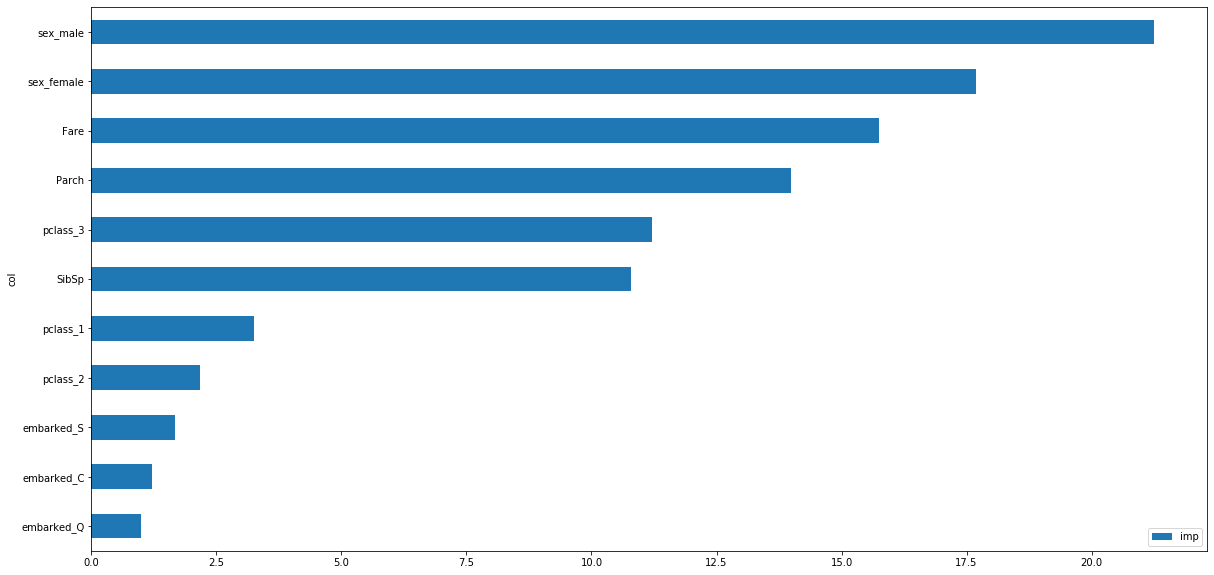

In [133]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

Why would you want feature importance?
Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

## Precision and Recall


Precision and Recall
Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

Recall = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

Precision = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an F1 score.

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [134]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


## Submission

Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the test dateframe, encode them and make a prediciton with our model.

In [135]:
# We need our test dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [136]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')


In [138]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)


In [139]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [140]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [141]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [142]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [143]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [145]:
# What does our submission have to look like?
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [146]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [147]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [148]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [149]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [150]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
